In [1]:
import os

os.getcwd()

In [2]:
os.chdir("D:\WORK\Data Science\ML- PROJECTS\Titanic_Survival")

In [3]:
import pandas as pd

data = pd.read_csv("train.csv") 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import math


In [7]:
print("Number of passengers on board : " +  str(len(data['PassengerId'])))

Number of passengers on board : 891


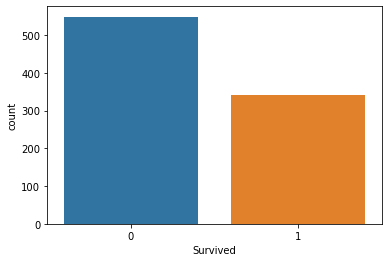

In [8]:
sns.countplot(x= "Survived", data= data)
plt.show()

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


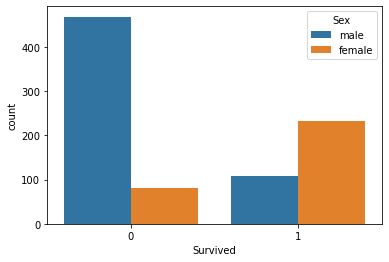

In [9]:
sns.countplot("Survived", hue= "Sex", data= data)
plt.show()

C:\Users\vikas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


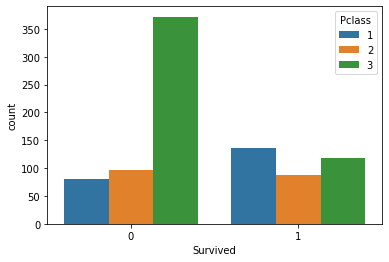

In [10]:
sns.countplot("Survived", hue= "Pclass", data= data)
plt.show()

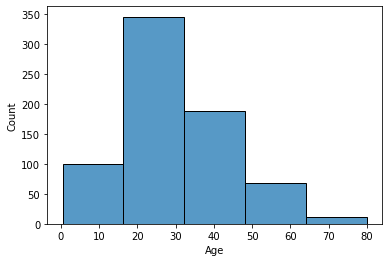

In [11]:
sns.histplot(data['Age'], bins= 5)
plt.show()

In [12]:
data['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

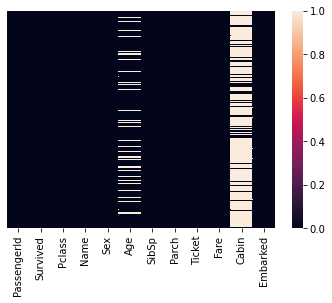

In [14]:
sns.heatmap(data.isnull(), yticklabels= False)

In [15]:
# Imputing the missing values

from sklearn.impute import SimpleImputer

imputer= SimpleImputer(strategy= 'median')

In [16]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [17]:
miss_data= data['Age']
miss_data= pd.DataFrame(miss_data)

In [18]:
imputer.fit(miss_data)

SimpleImputer(strategy='median')

In [19]:
miss_data_filled= imputer.transform(miss_data)

In [20]:
miss_data_filled= pd.DataFrame(miss_data_filled, columns= miss_data.columns)

In [21]:
miss_data_filled

,Age
0,22.0
1,38.0
2,26.0
3,35.0
4,35.0
...,...
886,27.0
887,19.0
888,28.0
889,26.0


In [22]:
data.drop('Age', axis= 1, inplace= True)

In [23]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S


In [24]:
data= pd.concat([data, miss_data_filled], axis= 1)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,NaN,S,35.0


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Age          891 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


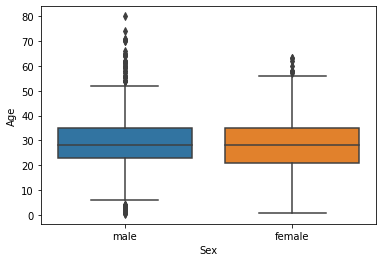

In [27]:
sns.boxplot(x= "Sex", y= "Age", data= data )
plt.show()

In [28]:
data.drop('Cabin', axis=1, inplace= True)

In [29]:
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Embarked,Age
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500,S,35.0
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,Q,28.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,0,0,17463,51.8625,S,54.0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,3,1,349909,21.0750,S,2.0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,0,2,347742,11.1333,S,27.0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,1,0,237736,30.0708,C,14.0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Embarked     889 non-null    object 
 10  Age          891 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [31]:
data.dropna(inplace= True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Ticket       889 non-null    object 
 8   Fare         889 non-null    float64
 9   Embarked     889 non-null    object 
 10  Age          889 non-null    float64
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


<AxesSubplot:>

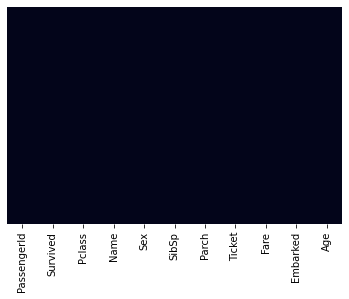

In [33]:
sns.heatmap(data.isnull(), yticklabels= False, cbar= False)

In [34]:
data['Parch'].value_counts

<bound method IndexOpsMixin.value_counts of 0      0
1      0
2      0
3      0
4      0
      ..
886    0
887    0
888    2
889    0
890    0
Name: Parch, Length: 889, dtype: int64>

In [35]:
## handling the categorical data

sex= pd.get_dummies(data['Sex'], drop_first= True)

In [36]:
type(sex)

pandas.core.frame.DataFrame

In [37]:
embarked= pd.get_dummies(data['Embarked'], drop_first= True)


In [38]:
data['Parch'].value_counts()

0    676
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [39]:
pclass= pd.get_dummies(data['Pclass'], drop_first= True)
sibsp= pd.get_dummies(data['SibSp'], drop_first= True)
parch= pd.get_dummies(data['Parch'], drop_first= True)

In [40]:
data= pd.concat([data, sex, embarked, pclass, sibsp, parch], axis=1)

In [41]:
data.drop(['PassengerId','Pclass', 'Name', 'Sex', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked' ], axis=1, inplace= True)

In [42]:
data.head()

,Survived,Age,male,Q,S,2,3,1,2,3,4,5,8,1,2,3,4,5,6
0,0,22.0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,26.0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,35.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,35.0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [43]:
from sklearn.model_selection import StratifiedShuffleSplit


split= StratifiedShuffleSplit(n_splits= 1, test_size= 0.3, random_state= 42)

for train_index, test_index in split.split(data, data['male']):
    strat_train_set= data.iloc[train_index]
    strat_test_set= data.iloc[test_index]
    
    

In [44]:
strat_train_set['male'].value_counts()

1    404
0    218
Name: male, dtype: int64

In [45]:
strat_test_set['male'].value_counts()

1    173
0     94
Name: male, dtype: int64

In [46]:
Y_train= strat_train_set['Survived']
Y_test= strat_test_set['Survived']

In [47]:
X_train= strat_train_set.drop('Survived', axis= 1)
X_test= strat_test_set.drop('Survived', axis= 1)

In [48]:
X_train.columns

Index(['Age', 'male', 'Q', 'S', 2, 3, 1, 2, 3, 4, 5, 8, 1, 2, 3, 4, 5, 6], dtype='object')

In [49]:
from sklearn.linear_model import LogisticRegression

log_model= LogisticRegression()

log_model.fit(X_train, Y_train)

C:\Users\vikas\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
predictions= log_model.predict(X_test)

In [51]:
from sklearn.metrics import classification_report

classification_report(Y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.88      0.85      0.86       171\n           1       0.75      0.79      0.77        96\n\n    accuracy                           0.83       267\n   macro avg       0.81      0.82      0.82       267\nweighted avg       0.83      0.83      0.83       267\n'

In [52]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, predictions)

array([[145,  26],
       [ 20,  76]], dtype=int64)

In [53]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, predictions)


0.8277153558052435

In [54]:
test_data= pd.read_csv("test.csv")

In [55]:
test_data.shape

(418, 11)

In [56]:
test_data['Parch'].value_counts()

0    324
1     52
2     33
3      3
9      2
4      2
6      1
5      1
Name: Parch, dtype: int64

In [57]:
test_miss_data= test_data['Age']
test_miss_data= pd.DataFrame(test_miss_data)

imputer.fit(test_miss_data)

test_miss_data_filled= imputer.transform(test_miss_data)

test_miss_data_filled= pd.DataFrame(test_miss_data_filled, columns= test_miss_data.columns)

test_miss_data_filled

,Age
0,34.5
1,47.0
2,62.0
3,27.0
4,22.0
...,...
413,27.0
414,39.0
415,38.5
416,27.0


In [58]:
test_data.drop('Age', axis= 1, inplace= True)

In [59]:
test_data= pd.concat([test_data, test_miss_data_filled], axis=1)

In [60]:
test_data

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
0,892,3,"Kelly, Mr. James",male,0,0,330911,7.8292,NaN,Q,34.5
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,1,0,363272,7.0000,NaN,S,47.0
2,894,2,"Myles, Mr. Thomas Francis",male,0,0,240276,9.6875,NaN,Q,62.0
3,895,3,"Wirz, Mr. Albert",male,0,0,315154,8.6625,NaN,S,27.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,1,1,3101298,12.2875,NaN,S,22.0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,0,0,A.5. 3236,8.0500,NaN,S,27.0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,0,0,PC 17758,108.9000,C105,C,39.0
415,1307,3,"Saether, Mr. Simon Sivertsen",male,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,38.5
416,1308,3,"Ware, Mr. Frederick",male,0,0,359309,8.0500,NaN,S,27.0


In [61]:
sex= pd.get_dummies(test_data['Sex'], drop_first= True)
embarked= pd.get_dummies(test_data['Embarked'], drop_first= True)
pclass= pd.get_dummies(test_data['Pclass'], drop_first= True)
sibsp= pd.get_dummies(test_data['SibSp'], drop_first= True)
parch= pd.get_dummies(test_data['Parch'], drop_first= True)

In [62]:
test_data.drop(['PassengerId','Pclass', 'Name', 'Sex', 'SibSp','Parch', 'Ticket', 'Fare','Embarked' , 'Cabin'], axis=1, inplace= True)

In [63]:
test_data= pd.concat([test_data, sex, embarked, pclass, sibsp, parch], axis=1)
test_data.columns

Index(['Age', 'male', 'Q', 'S', 2, 3, 1, 2, 3, 4, 5, 8, 1, 2, 3, 4, 5, 6, 9], dtype='object')

In [64]:
test_data= test_data.iloc[:, :18]

test_data.columns

Index(['Age', 'male', 'Q', 'S', 2, 3, 1, 2, 3, 4, 5, 8, 1, 2, 3, 4, 5, 6], dtype='object')

In [65]:
test_data_predictions= log_model.predict(test_data)

test_data_predictions= pd.DataFrame(test_data_predictions)

In [81]:
test_data_predictions[0].value_counts()

0    257
1    161
Name: Survived, dtype: int64

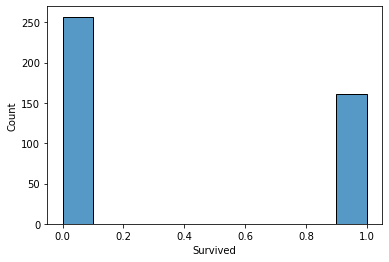

In [88]:
sns.histplot(test_data_predictions[0])
plt.show()

In [99]:
test_data_predictions= test_data_predictions.astype(object)

In [117]:
test_data_predictions= test_data_predictions.rename( columns= {0 : 'Survived'})

In [118]:
test_data_predictions

,Survived
0,0
1,0
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


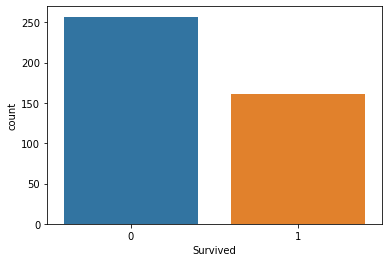

In [119]:
sns.countplot(x= 'Survived', data= test_data_predictions)
plt.show()